<a href="https://colab.research.google.com/github/yimgakevin/machine-learning/blob/main/supervised_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Train a Supervised Machine Learning Model**

The following diagram shows the process to build supervised learning models.
* Define Task: Write Down the Objective
* Acquire clean Data
* Understand the data : inspect the data(Define the Features,Look at the Data Shape, Apply Descriptive Statistics) and visualize
* prepare the data: Select Features, Split Into Input and Target Features,
* Build model: Split Into Training and Test Sets, Select the Algorithm, Fit the Model to the Data, Check the Model,
* Evaluate Models: Compute the Accuracy Score
* Finalise and deploy  

In our sample project, the task is:

Use life expectancy and long-term unemployment rate to predict the perceived happiness (low or high) of inhabitants of a country.

## import the librairie

In [52]:
# Import the python librairie for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# import the python librairie for machine learning we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## define the task

Use life expectancy and long-term unemployment rate to predict the perceived happiness (low or high) of inhabitants of a country.

## Acquire clean data


### inspect the data

In [54]:
dataset = pd.read_csv('/content/world_data_really_tiny.csv')

In [55]:
dataset

country  lifeexp  unemployment happiness
0        Albania     77.6          6.09       Low
1       Bulgaria     75.0          3.24       Low
2           Iran     75.8          2.11       Low
3        Ukraine     71.9          1.53       Low
4   South Africa     61.8          7.52       Low
5        Ukraine     71.9          1.53       Low
6        Austria     81.4          1.43      High
7        Croatia     77.3          5.53      High
8        Denmark     80.7          1.36      High
9         Serbia     75.7          4.96      High
10     Indonesia     71.4          1.26      High
11      Thailand     77.5          0.06      High

In [56]:
dataset.shape


(12, 4)

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       12 non-null     object 
 1   lifeexp       12 non-null     float64
 2   unemployment  12 non-null     float64
 3   happiness     12 non-null     object 
dtypes: float64(2), object(2)
memory usage: 516.0+ bytes


In [58]:
dataset.describe()

lifeexp  unemployment
count  12.000000     12.000000
mean   74.833333      3.051667
std     5.213328      2.377664
min    61.800000      0.060000
25%    71.900000      1.412500
50%    75.750000      1.820000
75%    77.525000      5.102500
max    81.400000      7.520000

### visualize

In [59]:
from functions import *

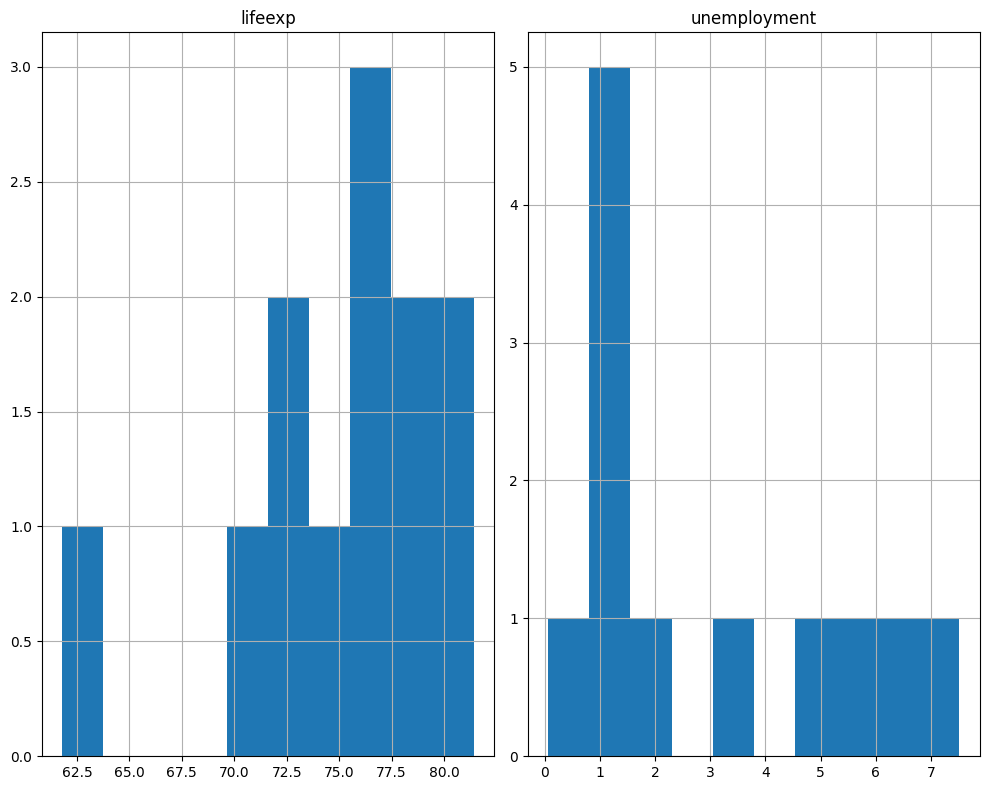

In [60]:
histplotAll(dataset)

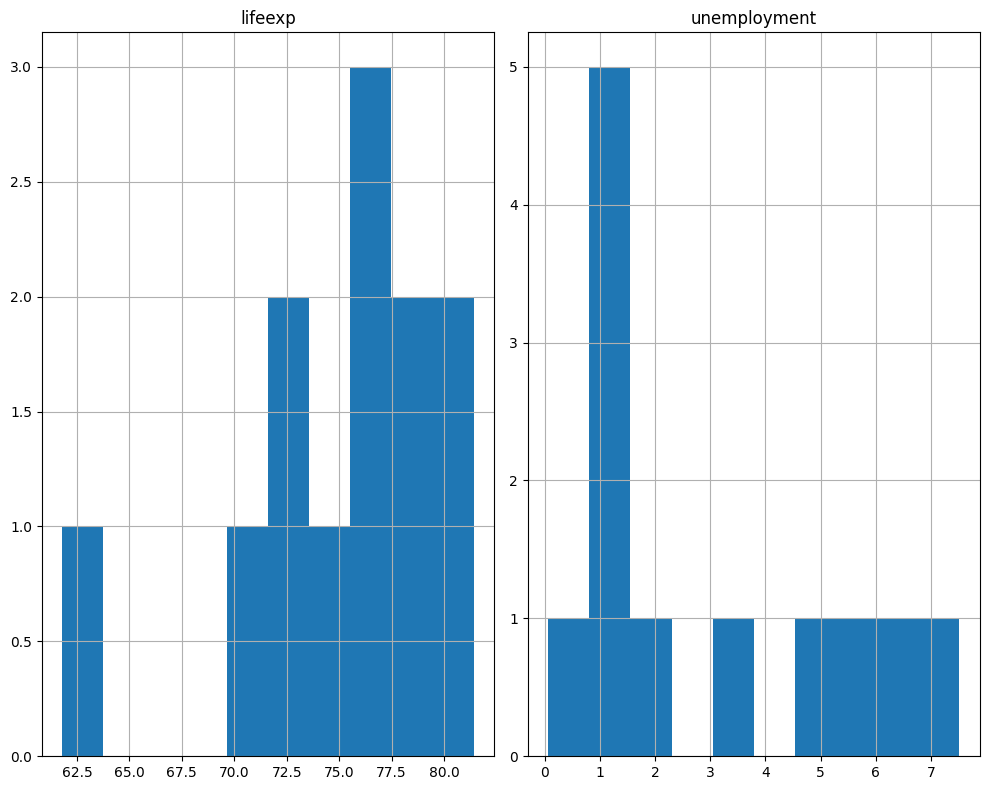

In [61]:
def histplotAll(df):
    """
    Plots histograms for all numerical columns in a pandas DataFrame.

    Args:
        df: pandas DataFrame
    """
    numerical_cols = df.select_dtypes(include=np.number).columns
    df[numerical_cols].hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()

# Now call the function with your dataset
histplotAll(dataset)

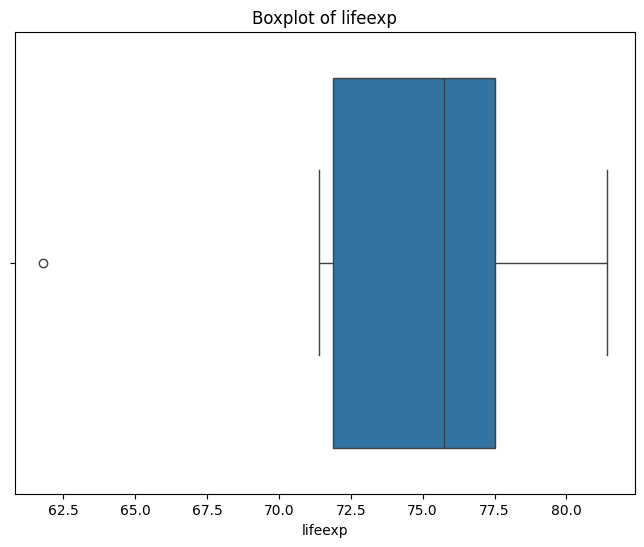

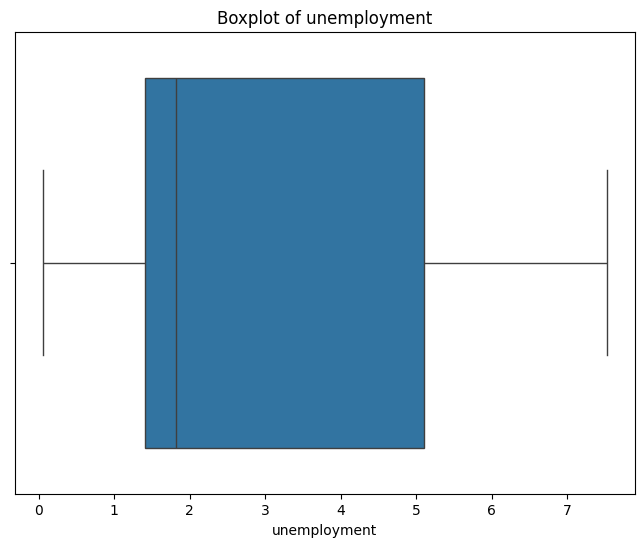

In [62]:
def plot_numerical_boxplots(df):
    """
    Plots boxplots for all numerical columns in a pandas DataFrame.

    Args:
        df: pandas DataFrame
    """
    numerical_cols = df.select_dtypes(include=np.number).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# Now call the function with your dataset
plot_numerical_boxplots(dataset)

## prepare data for machine learning

Select Features and Split Into Input and Target Features,

In [63]:
y= dataset['happiness']

In [64]:
X= dataset[['lifeexp','unemployment']]

In [65]:
X.head()

lifeexp  unemployment
0     77.6          6.09
1     75.0          3.24
2     75.8          2.11
3     71.9          1.53
4     61.8          7.52

In [66]:
y.head()

0    Low
1    Low
2    Low
3    Low
4    Low
Name: happiness, dtype: object

## Build the model

### split into train and test set

In [67]:
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [68]:
X_train

lifeexp  unemployment
0      77.6          6.09
1      75.0          3.24
11     77.5          0.06
8      80.7          1.36
3      71.9          1.53
6      81.4          1.43
9      75.7          4.96
4      61.8          7.52

In [69]:
X_test

lifeexp  unemployment
7      77.3          5.53
10     71.4          1.26
2      75.8          2.11
5      71.9          1.53

In [70]:
y_train

0      Low
1      Low
11    High
8     High
3      Low
6     High
9     High
4      Low
Name: happiness, dtype: object

In [71]:
y_test

7     High
10    High
2      Low
5      Low
Name: happiness, dtype: object

### select an algorithms

In [72]:
model = DecisionTreeClassifier()

### fit the model

In [73]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

### check the model

In [74]:
prediction = model.predict(X_train)
print(accuracy_score(y_train, prediction))

1.0


## Evaluate the model

In [75]:
predictions = model.predict(X_test)


In [76]:
predictions

array(['Low', 'Low', 'High', 'Low'], dtype=object)

In [77]:
print(accuracy_score(y_test, predictions))

0.25


In [78]:
df =X_test.copy()
df['Actual'] = y_test
df['Predicted'] = predictions
df

lifeexp  unemployment Actual Predicted
7      77.3          5.53   High       Low
10     71.4          1.26   High       Low
2      75.8          2.11    Low      High
5      71.9          1.53    Low       Low

Examine the rules created by sklearn

In [79]:
viewDecisionTree(model, X)


ValueError: Length of feature_names, 12 does not match number of features, 2

In [51]:
!pip install graphviz

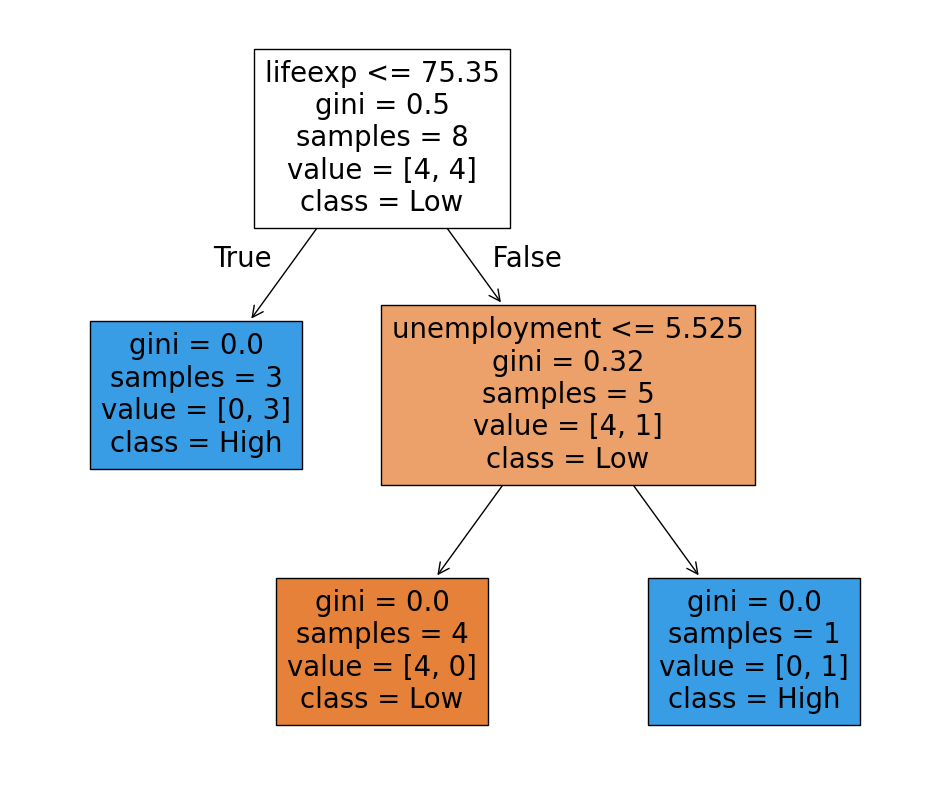

In [81]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 10))
plot_tree(model, feature_names=X.columns, class_names=['Low', 'High'], filled=True)
plt.show()

## feature engineering
Feature engineering is the creation of new input or target features from existing features

In [82]:
# load data
data = pd.read_csv('/content/fe_binning.csv')

In [83]:
data

country  happiness
0    Afghanistan   3.982855
1        Albania   4.606651
2      Argentina   6.697131
3        Armenia   4.348320
4      Australia   7.309061
..           ...        ...
138    Venezuela   5.568800
139      Vietnam   5.076315
140        Yemen   2.982674
141       Zambia   4.843164
142     Zimbabwe   3.703191

[143 rows x 2 columns]

In [84]:
data.shape

(143, 2)

In [85]:
data.describe()

happiness
count  143.000000
mean     5.404037
std      1.116106
min      2.701591
25%      4.614304
50%      5.344383
75%      6.279204
max      7.603434

In [86]:
data.isna().sum()

country      0
happiness    0
dtype: int64

In [87]:
data.duplicated().sum()

np.int64(0)

In [88]:
# Allocate happiness to bins
binned = pd.cut(data["happiness"], bins = [0,4.5,6,10], labels = ["L","M","H"])

# Add the binned values as a new categorical feature
data["happiness_band"] = binned

In this case, I have chosen to split the data into bins containing countries with happiness values of 0 to 4.5, 4.5 to 6, and 6 to 10.

In [89]:
data.groupby("happiness_band").size()

/tmp/ipython-input-2335293788.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("happiness_band").size()


happiness_band
L    31
M    68
H    44
dtype: int64

Categorical Binning With Python

In [90]:
mapping = pd.read_csv("/content/country_region.csv")

In [91]:
mapping

country                      region
0           Afghanistan                  South Asia
1               Albania       Europe & Central Asia
2               Algeria  Middle East & North Africa
3        American Samoa         East Asia & Pacific
4               Andorra       Europe & Central Asia
..                  ...                         ...
219      Virgin Islands   Latin America & Caribbean
220  West Bank and Gaza  Middle East & North Africa
221               Yemen  Middle East & North Africa
222              Zambia          Sub-Saharan Africa
223            Zimbabwe          Sub-Saharan Africa

[224 rows x 2 columns]

In [92]:
data = pd.merge(data, mapping, left_on='country', right_on='country', how="left")

In [93]:
data

country  happiness happiness_band                      region
0    Afghanistan   3.982855              L                  South Asia
1        Albania   4.606651              M       Europe & Central Asia
2      Argentina   6.697131              H   Latin America & Caribbean
3        Armenia   4.348320              L       Europe & Central Asia
4      Australia   7.309061              H         East Asia & Pacific
..           ...        ...            ...                         ...
138    Venezuela   5.568800              M   Latin America & Caribbean
139      Vietnam   5.076315              M         East Asia & Pacific
140        Yemen   2.982674              L  Middle East & North Africa
141       Zambia   4.843164              M          Sub-Saharan Africa
142     Zimbabwe   3.703191              L          Sub-Saharan Africa

[143 rows x 4 columns]

In [94]:
df2 = pd.read_csv("/content/fe_splitting.csv")
df2.head()

borough                                     property_type  \
0  Kensington And chelsea  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
1                  Camden  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
2               Southwark  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
3             Westminster  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
4    Barking And dagenham                          House - single occupancy   

  timestamp_of_call  
0  01/01/2017 16:48  
1  01/01/2017 22:20  
2  01/01/2017 09:51  
3  01/01/2017 00:28  
4  01/01/2017 13:33

In [95]:
df2["timestamp_of_call"] = pd.to_datetime(df2["timestamp_of_call"], dayfirst=True)

In [96]:
df2.dtypes

borough                      object
property_type                object
timestamp_of_call    datetime64[ns]
dtype: object

Now add some new features by extracting the components of the timestamp_of_call:

In [97]:
df2["day"] = df2["timestamp_of_call"].dt.day
df2["month"] = df2["timestamp_of_call"].dt.month
df2["year"] = df2["timestamp_of_call"].dt.year
df2["weekday"] = df2["timestamp_of_call"].dt.weekday
df2["hour"] = df2["timestamp_of_call"].dt.hour
df2["minute"] = df2["timestamp_of_call"].dt.minute



In [98]:
df2.head()

borough                                     property_type  \
0  Kensington And chelsea  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
1                  Camden  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
2               Southwark  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
3             Westminster  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
4    Barking And dagenham                          House - single occupancy   

    timestamp_of_call  day  month  year  weekday  hour  minute  
0 2017-01-01 16:48:00    1      1  2017        6    16      48  
1 2017-01-01 22:20:00    1      1  2017        6    22      20  
2 2017-01-01 09:51:00    1      1  2017        6     9      51  
3 2017-01-01 00:28:00    1      1  2017        6     0      28  
4 2017-01-01 13:33:00    1      1  2017        6    13      33

In [99]:
df2.isnull().mean()



borough              0.0
property_type        0.0
timestamp_of_call    0.0
day                  0.0
month                0.0
year                 0.0
weekday              0.0
hour                 0.0
minute               0.0
dtype: float64

In [100]:
df2["property_type"].unique()

array(['Purpose Built Flats/Maisonettes - 4 to 9 storeys',
       'House - single occupancy',
       'Converted Flat/Maisonette - Up to 2 storeys',
       'Purpose Built Flats/Maisonettes - Up to 3 storeys',
       'Purpose Built Flats/Maisonettes - 10 or more storeys',
       'Converted Flat/Maisonettes - 3 or more storeys',
       'Self contained Sheltered Housing',
       'Unlicensed House in Multiple Occupation - Up to 2 storeys',
       'House in Multiple Occupation - 3 or more storeys (not known if licensed)',
       'Student Hall of Residence', 'Other Residential Home',
       'Unlicensed House in Multiple Occupation - 3 or more storeys',
       'Nursing/Care Home/Hospice', "Nurses'/Doctors' accommodation",
       'House in Multiple Occupation - Up to 2 storeys (not known if licensed)',
       'Hotel/motel', "Children's Home",
       'Hostel (e.g. for homeless people)', 'Retirement/Old Persons Home',
       'Licensed House in Multiple Occupation - Up to 2 storeys',
       'Bunga

In [101]:
df2[['property_type_type', 'property_type_size']] = df2["property_type"].str.split("-",expand=True)
df2.head()

borough                                     property_type  \
0  Kensington And chelsea  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
1                  Camden  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
2               Southwark  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
3             Westminster  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
4    Barking And dagenham                          House - single occupancy   

    timestamp_of_call  day  month  year  weekday  hour  minute  \
0 2017-01-01 16:48:00    1      1  2017        6    16      48   
1 2017-01-01 22:20:00    1      1  2017        6    22      20   
2 2017-01-01 09:51:00    1      1  2017        6     9      51   
3 2017-01-01 00:28:00    1      1  2017        6     0      28   
4 2017-01-01 13:33:00    1      1  2017        6    13      33   

                 property_type_type property_type_size  
0  Purpose Built Flats/Maisonettes      4 to 9 storeys  
1  Purpose Built Flats/Maisonettes      4 to 9 storeys  
2  Purpose Built Flats/Maisonettes      4 to 9 storeys  
3  Purpose Built Flats/Maisonettes      4 to 9 storeys  
4                            House    single occupancy

###One hot oncoding
The sklearn libraries can't build models with categorical data, so if you want to build models using categorical features, you need to convert them to numerical ones. One-hot encoding is a way of doing this.  
One-hot encoding places each category in a column as a new feature, with a 1 or 0 to indicate if it's on or off.

In [102]:
df4 = pd.read_csv("/content/fe_one_hot.csv")
df4.head()

country  happiness                     region
0  Afghanistan   3.982855                 South Asia
1      Albania   4.606651      Europe & Central Asia
2    Argentina   6.697131  Latin America & Caribbean
3      Armenia   4.348320      Europe & Central Asia
4    Australia   7.309061        East Asia & Pacific

Use the pandas  get_dummies()  function to convert the required column to dummy variables:

In [103]:
region_one_hot = pd.get_dummies(df4.region, dtype=int)
region_one_hot.head()

East Asia & Pacific  Europe & Central Asia  Latin America & Caribbean  \
0                    0                      0                          0   
1                    0                      1                          0   
2                    0                      0                          1   
3                    0                      1                          0   
4                    1                      0                          0   

   Middle East & North Africa  North America  South Asia  Sub-Saharan Africa  
0                           0              0           1                   0  
1                           0              0           0                   0  
2                           0              0           0                   0  
3                           0              0           0                   0  
4                           0              0           0                   0

In [104]:
df4 = df4.join(region_one_hot).drop('region', axis=1)
df4.head()

country  happiness  East Asia & Pacific  Europe & Central Asia  \
0  Afghanistan   3.982855                    0                      0   
1      Albania   4.606651                    0                      1   
2    Argentina   6.697131                    0                      0   
3      Armenia   4.348320                    0                      1   
4    Australia   7.309061                    1                      0   

   Latin America & Caribbean  Middle East & North Africa  North America  \
0                          0                           0              0   
1                          0                           0              0   
2                          1                           0              0   
3                          0                           0              0   
4                          0                           0              0   

   South Asia  Sub-Saharan Africa  
0           1                   0  
1           0                   0  
2           0                   0  
3           0                   0  
4           0                   0

## Understand the Decision Trees Algorithm
The Gini coefficient, or Gini index, measures the level of dispersion of a feature in a dataset.  
When constructing a decision tree, work from the top down. The boxes are called nodes. The top one is called the root. The nodes at the bottom, which have no nodes below them, are called leaf nodes.

So, the first task is to work out what questions to ask at the root node. Each question is made up of two parts: the feature and the threshold value.
***
A Gini of 0 for a feature signifies a sample where every data point has the same value for that feature (perfect equality).
***
A Gini approaching 1 for a feature signifies a large sample where one individual is different from all the others (perfect inequality).
***
Decision trees can be constructed by finding rules that split unequal groups into groups that have a lower overall Gini.

## Logistic regression

### Import the libraries we need

In [132]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn functionality
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error

# Convenience functions.  This can be found on the course github
from functions import *

### Define the task
"Make predictions about a country's life expectancy in years from a set of metrics for the country."

### Acquire clean data

#### Load the data
We will load and clean our data.

In [106]:
# Load the data set
datasett = pd.read_csv("/content/world_data.csv")


In [107]:
datasett.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          194 non-null    object 
 1   happiness        140 non-null    float64
 2   income           193 non-null    float64
 3   lifeexp          187 non-null    float64
 4   sanitation       194 non-null    float64
 5   water            194 non-null    float64
 6   urbanpopulation  119 non-null    float64
 7   unemployment     112 non-null    float64
 8   literacy         149 non-null    float64
 9   inequality       160 non-null    float64
 10  murder           93 non-null     float64
 11  energy           169 non-null    float64
 12  childmortality   193 non-null    float64
 13  fertility        184 non-null    float64
 14  hiv              149 non-null    float64
 15  foodsupply       168 non-null    float64
 16  population       194 non-null    int64  
dtypes: float64(15), 

In [108]:
datasett.shape

(194, 17)

In [109]:
datasett.describe()

happiness         income     lifeexp  sanitation       water  \
count  140.000000     193.000000  187.000000  194.000000  194.000000   
mean     5.395765   17432.849741   71.933690   73.838247   86.329381   
std      1.123605   19122.183694    7.605557   29.269367   17.568245   
min      2.701591     623.000000   49.600000    7.080000   19.300000   
25%      4.610368    3290.000000   66.050000   49.225000   77.900000   
50%      5.331034   11000.000000   73.300000   87.900000   94.950000   
75%      6.257746   24100.000000   77.500000   97.700000   99.300000   
max      7.603434  120000.000000   83.800000  100.000000  100.000000   

       urbanpopulation  unemployment    literacy  inequality     murder  \
count       119.000000     112.00000  149.000000  160.000000  93.000000   
mean         24.322185       1.90881   81.573826   38.579375   4.953132   
std          15.569400       2.04772   19.476814    7.995857  10.261882   
min           3.880000       0.01820   25.300000   16.600000   0.057800   
25%          13.450000       0.58675   70.300000   32.775000   0.660000   
50%          20.500000       1.25000   90.000000   37.450000   1.400000   
75%          29.000000       2.16500   97.400000   43.125000   4.820000   
max         100.000000      10.70000  100.000000   63.000000  77.600000   

             energy  childmortality   fertility           hiv   foodsupply  \
count    169.000000      193.000000  184.000000  1.490000e+02   168.000000   
mean    2183.725325       31.441451    2.835924  2.179917e+05  2845.952381   
std     2806.613656       31.319236    1.372184  6.304909e+05   444.201818   
min        9.580000        2.200000    1.240000  6.000000e+01  1880.000000   
25%      563.000000        8.200000    1.777500  7.600000e+03  2505.000000   
50%     1250.000000       17.700000    2.335000  2.400000e+04  2825.000000   
75%     2710.000000       49.500000    3.842500  1.300000e+05  3200.000000   
max    18600.000000      137.000000    7.290000  5.600000e+06  3770.000000   

         population  
count  1.940000e+02  
mean   3.787195e+07  
std    1.419670e+08  
min    1.100000e+04  
25%    1.982500e+06  
50%    8.435000e+06  
75%    2.742500e+07  
max    1.400000e+09

In [110]:
datasett.isna().sum()

country              0
happiness           54
income               1
lifeexp              7
sanitation           0
water                0
urbanpopulation     75
unemployment        82
literacy            45
inequality          34
murder             101
energy              25
childmortality       1
fertility           10
hiv                 45
foodsupply          26
population           0
dtype: int64

In [111]:
datasett.isnull().mean().sort_values()

country            0.000000
sanitation         0.000000
water              0.000000
population         0.000000
childmortality     0.005155
income             0.005155
lifeexp            0.036082
fertility          0.051546
energy             0.128866
foodsupply         0.134021
inequality         0.175258
hiv                0.231959
literacy           0.231959
happiness          0.278351
urbanpopulation    0.386598
unemployment       0.422680
murder             0.520619
dtype: float64

In [112]:
# Compute the mean for each numerical feature
numerical_cols = datasett.select_dtypes(include=np.number).columns
means = datasett[numerical_cols].mean().to_dict()

# Impute each null with the mean of that feature for numerical columns
for m in means:
    datasett[m] = datasett[m].fillna(value=means[m])

In [113]:
datasett.isnull().mean()

country            0.0
happiness          0.0
income             0.0
lifeexp            0.0
sanitation         0.0
water              0.0
urbanpopulation    0.0
unemployment       0.0
literacy           0.0
inequality         0.0
murder             0.0
energy             0.0
childmortality     0.0
fertility          0.0
hiv                0.0
foodsupply         0.0
population         0.0
dtype: float64

### Understand the data
Let's use a nice plot style

In [114]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [115]:
plt.style.use('bmh')

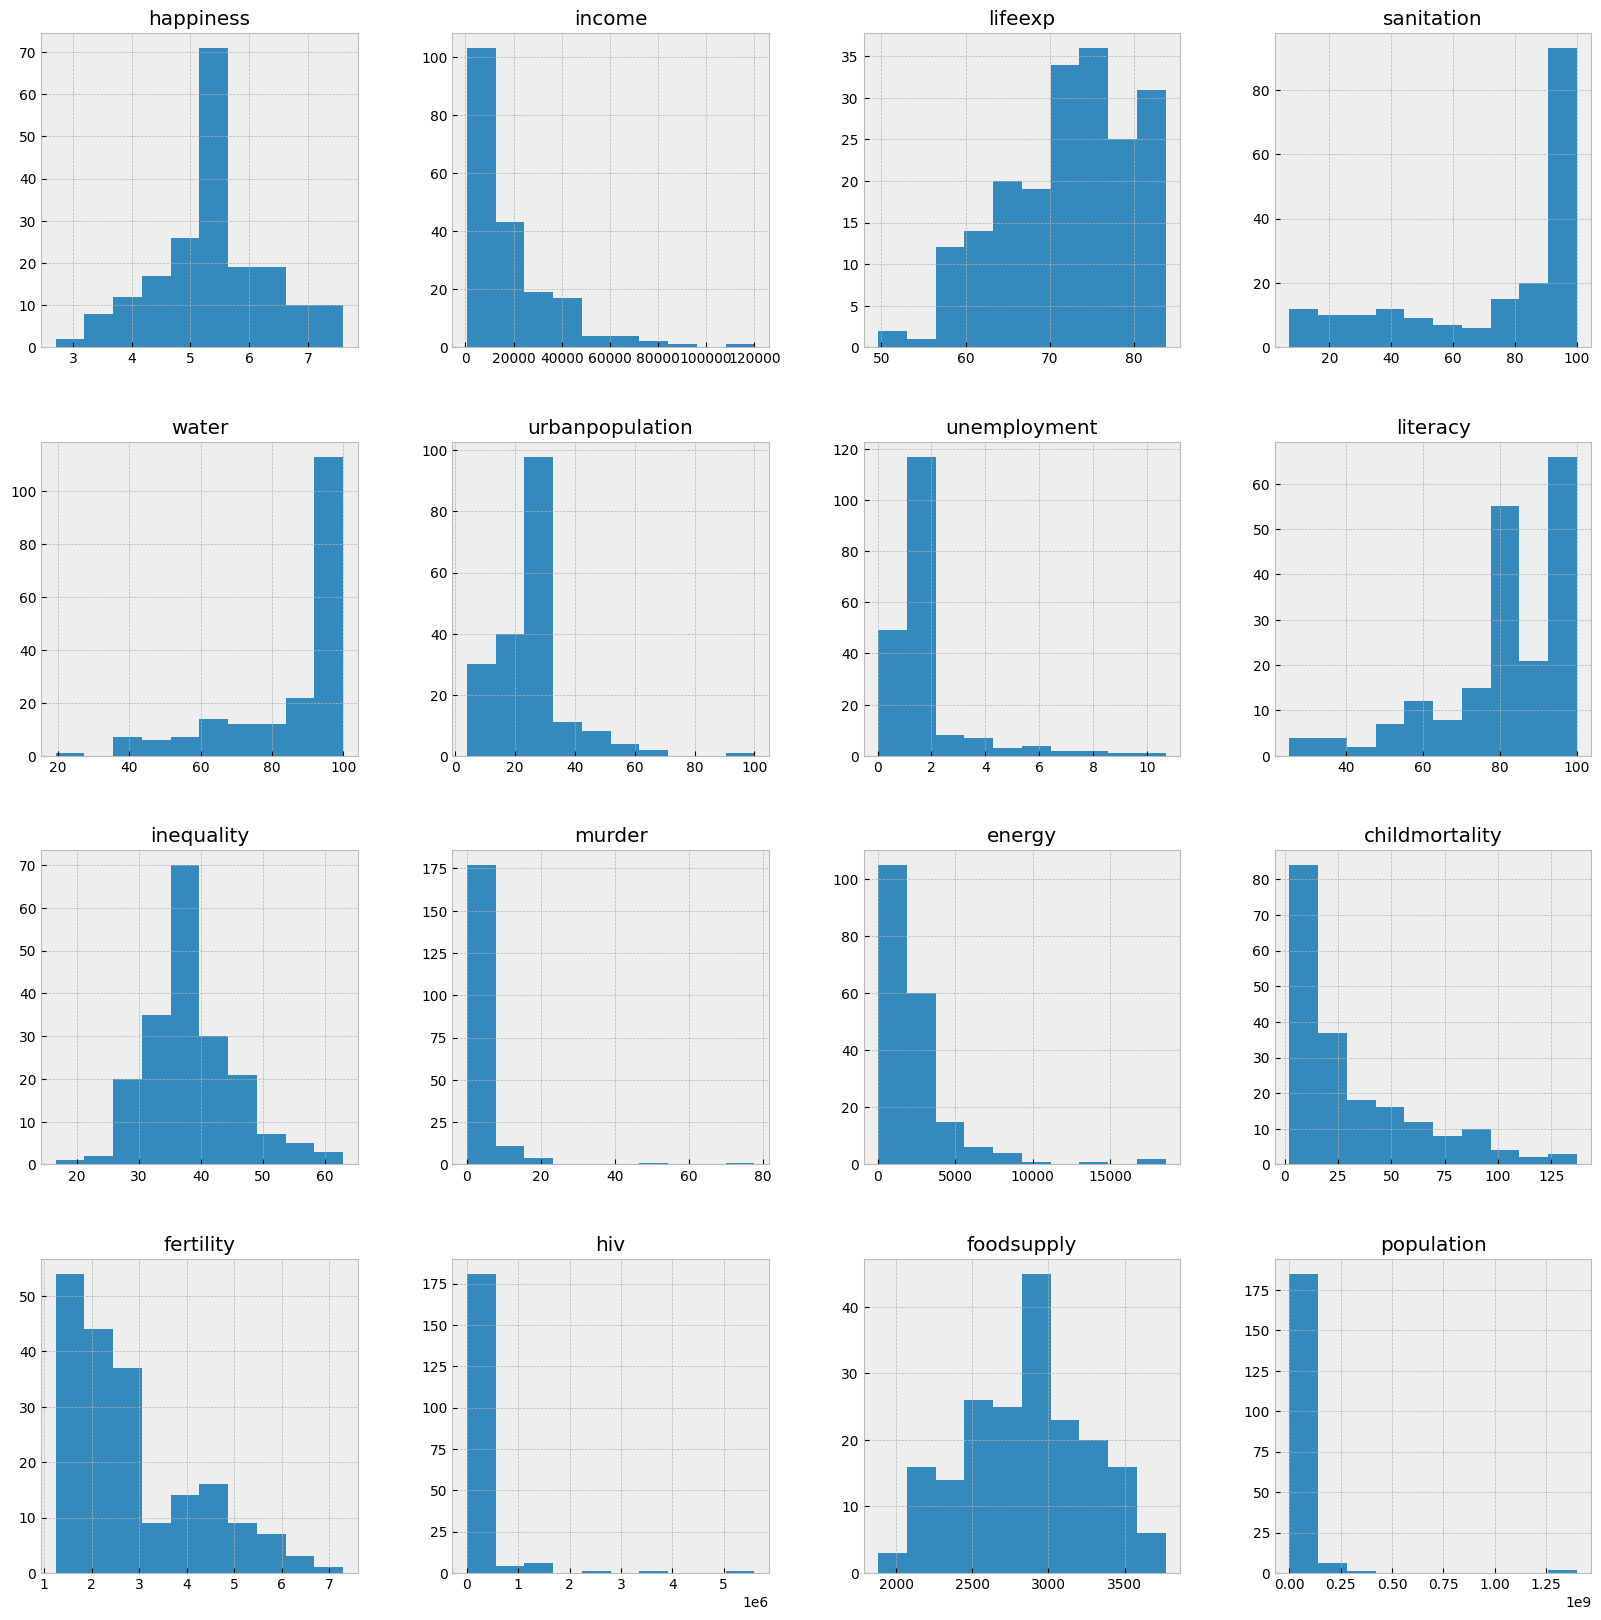

In [116]:
# Histogram plot
datasett.hist(figsize=(20,20))
plt.show()

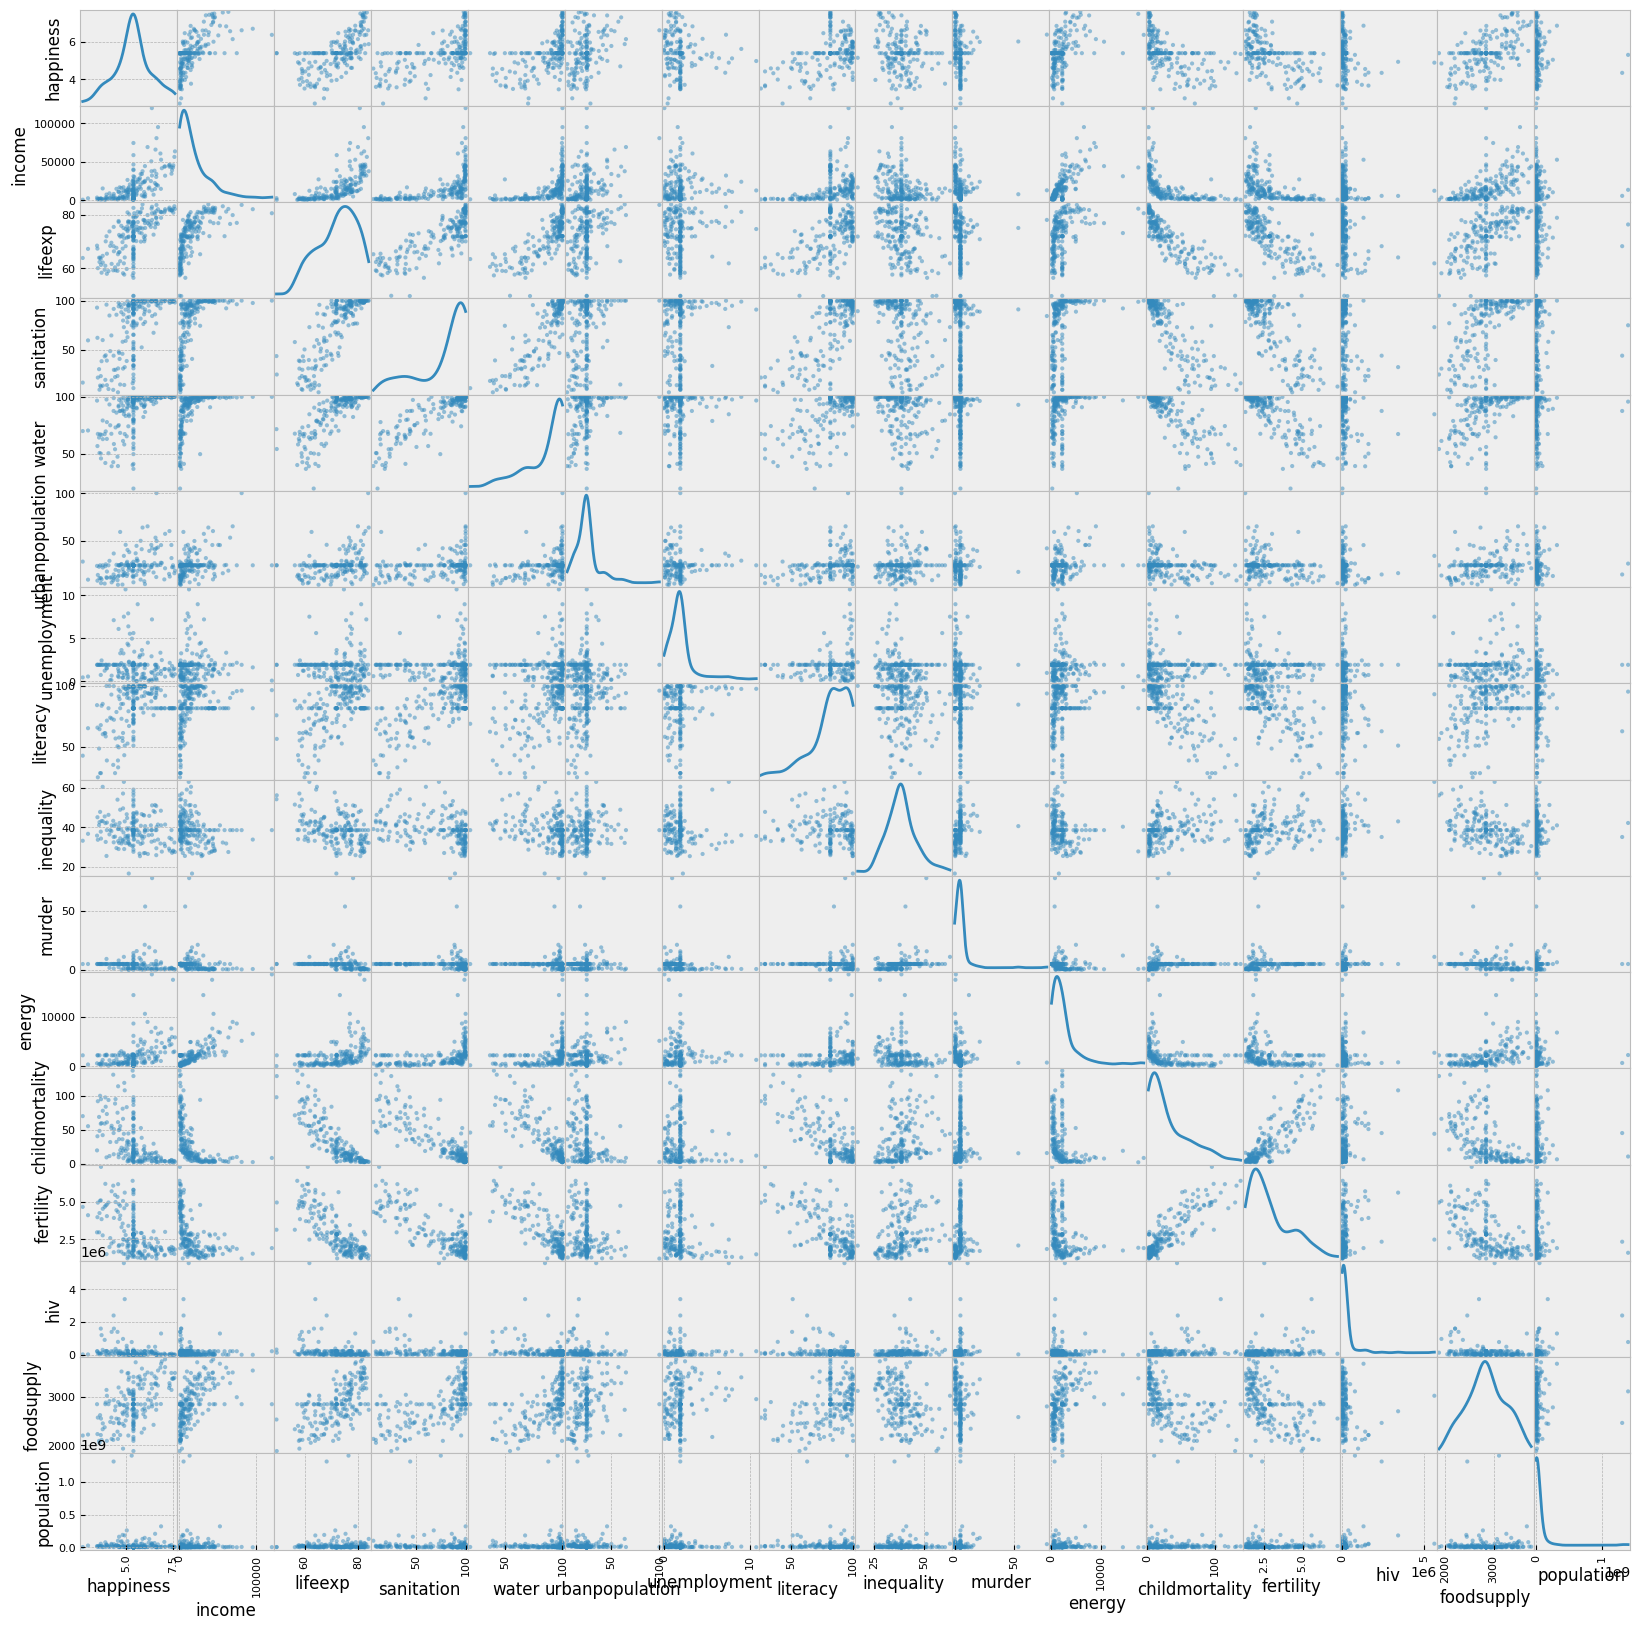

In [117]:
# Scatter plot
scatterMatrix(datasett)

In [118]:
datasett.describe()

happiness         income     lifeexp  sanitation       water  \
count  194.000000     194.000000  194.000000  194.000000  194.000000   
mean     5.395765   17432.849741   71.933690   73.838247   86.329381   
std      0.953547   19072.580021    7.466359   29.269367   17.568245   
min      2.701591     623.000000   49.600000    7.080000   19.300000   
25%      4.891838    3297.500000   66.425000   49.225000   77.900000   
50%      5.395765   11050.000000   72.550000   87.900000   94.950000   
75%      5.880369   24100.000000   77.400000   97.700000   99.300000   
max      7.603434  120000.000000   83.800000  100.000000  100.000000   

       urbanpopulation  unemployment    literacy  inequality      murder  \
count       194.000000    194.000000  194.000000  194.000000  194.000000   
mean         24.322185      1.908810   81.573826   38.579375    4.953132   
std          12.174026      1.552935   17.055722    7.257464    7.085039   
min           3.880000      0.018200   25.300000   16.600000    0.057800   
25%          18.250000      1.085000   75.575000   34.000000    1.700000   
50%          24.322185      1.908810   81.573826   38.579375    4.953132   
75%          24.322185      1.908810   95.375000   42.175000    4.953132   
max         100.000000     10.700000  100.000000   63.000000   77.600000   

             energy  childmortality   fertility           hiv   foodsupply  \
count    194.000000      194.000000  194.000000  1.940000e+02   194.000000   
mean    2183.725325       31.441451    2.835924  2.179917e+05  2845.952381   
std     2618.536430       31.237992    1.336162  5.521169e+05   413.199619   
min        9.580000        2.200000    1.240000  6.000000e+01  1880.000000   
25%      614.500000        8.200000    1.790000  1.025000e+04  2570.000000   
50%     1565.000000       17.900000    2.415000  7.000000e+04  2845.952381   
75%     2425.000000       49.225000    3.687500  2.179917e+05  3140.000000   
max    18600.000000      137.000000    7.290000  5.600000e+06  3770.000000   

         population  
count  1.940000e+02  
mean   3.787195e+07  
std    1.419670e+08  
min    1.100000e+04  
25%    1.982500e+06  
50%    8.435000e+06  
75%    2.742500e+07  
max    1.400000e+09

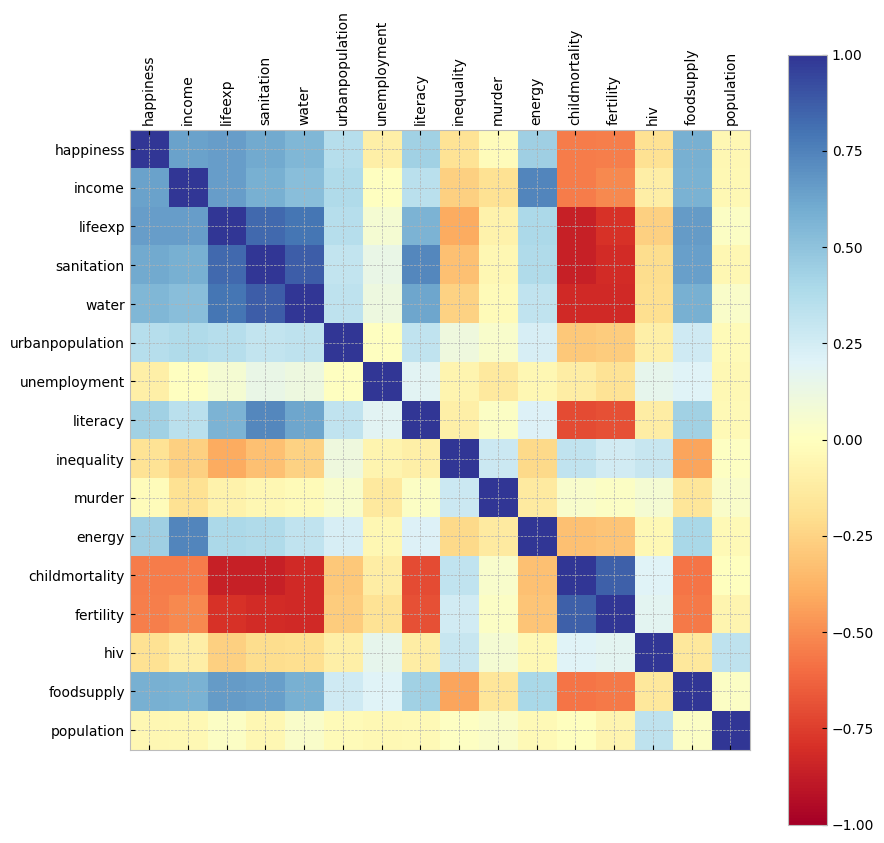

In [119]:
correlationMatrix(datasett.drop('country', axis=1))

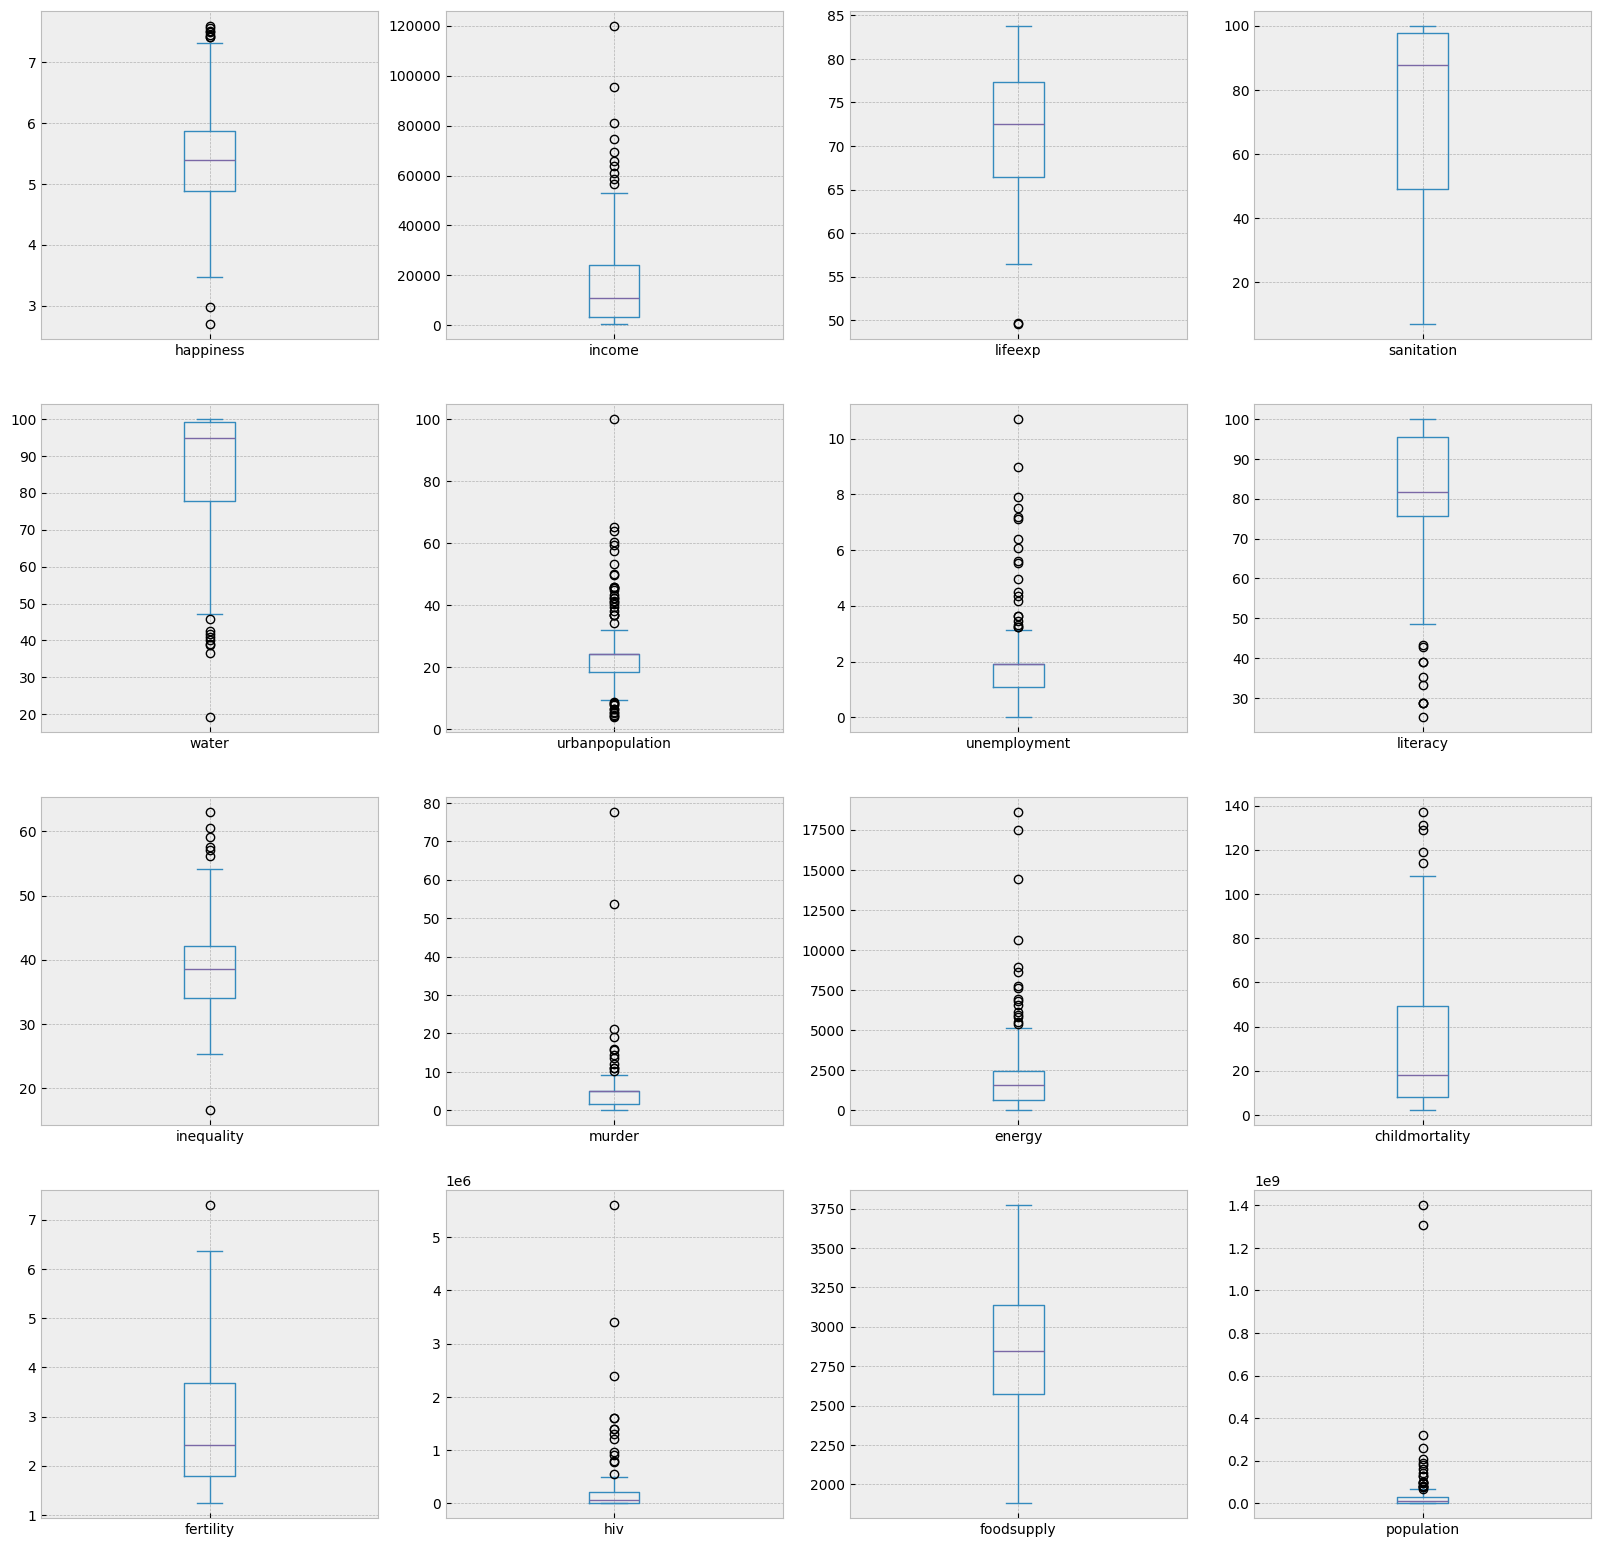

In [120]:
boxPlotAll(datasett)

### Prepare data

In [121]:
datasett = appendEqualCountsClass(datasett, "lifeexp_band", "lifeexp", 3, ["L","M","H"])

In [122]:
datasett.lifeexp_band.value_counts()

lifeexp_band
L    65
H    65
M    64
Name: count, dtype: int64

In [123]:
datasett[['lifeexp','lifeexp_band']].head()

lifeexp lifeexp_band
0     57.9            L
1     77.6            H
2     76.5            H
3     75.4            M
4     82.6            H

#### Select Features and Split Into Input and Target Features  
Now we need to decide which columns to use as input features and which is our target feature


In [124]:
y = datasett["lifeexp_band"]
X = datasett[['happiness', 'income', 'sanitation', 'water', 'literacy', 'inequality', 'energy', 'childmortality', 'fertility', 'hiv', 'foodsupply', 'population']]

### Scale Features
When we ran dataset.describe() above, you saw that the range of values between the min and max was different for different features.  
To prevent this, scale the data before building the model. There are a few approaches. In this case, I will use the  MinMaxScaler(), which scales the data so every feature ranges from 0 to 1.

In [125]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)



In [126]:
# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, columns=X.columns)

In [127]:
X.describe()

happiness      income  sanitation       water    literacy  inequality  \
count  194.000000  194.000000  194.000000  194.000000  194.000000  194.000000   
mean     0.549625    0.140813    0.718449    0.830600    0.753331    0.473693   
std      0.194528    0.159768    0.314995    0.217698    0.228323    0.156411   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.446821    0.022404    0.453562    0.726146    0.673025    0.375000   
50%      0.549625    0.087345    0.869780    0.937423    0.753331    0.473693   
75%      0.648486    0.196663    0.975248    0.991326    0.938086    0.551185   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           energy  childmortality   fertility         hiv  foodsupply  \
count  194.000000      194.000000  194.000000  194.000000  194.000000   
mean     0.116950        0.216925    0.263789    0.038917    0.511086   
std      0.140854        0.231736    0.220853    0.098593    0.218624   
min      0.000000        0.000000    0.000000    0.000000    0.000000   
25%      0.032539        0.044510    0.090909    0.001820    0.365079   
50%      0.083668        0.116469    0.194215    0.012489    0.511086   
75%      0.129928        0.348850    0.404545    0.038917    0.666667   
max      1.000000        1.000000    1.000000    1.000000    1.000000   

       population  
count  194.000000  
mean     0.027044  
std      0.101406  
min      0.000000  
25%      0.001408  
50%      0.006017  
75%      0.019582  
max      1.000000

Every feature now has a min of 0 and a max of 1:

### Build Model


#### Split Into Test and Training Sets

In [128]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#### Create Multiple Models, Fit and Check Them

In [129]:
# build decision tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [133]:
# build Logistic regression model
model_lr = LogisticRegression(solver='lbfgs', multi_class='auto')
model_lr.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto')

We now have two trained models.

#### Check the Models
At this stage, we can check how well the models performed on the training data itself, and compute the accuracy score for each model.

In [136]:
# check the model performance with the training data
prediction_dt = model_dt.predict(X_train)
print("DecisionTreeClassifier", accuracy_score(Y_train, prediction_dt))

DecisionTreeClassifier 1.0


In [137]:
# Check the model performance with the training data
prediction_lr = model_lr.predict(X_train)
print("LogisticRegression", accuracy_score(Y_train, prediction_lr))

LogisticRegression 0.8217054263565892


The accuracy score for each model predictions with the training data is below each code block. Based on the training data, the decision tree has done a great job, getting 100% of the classifications right! However, we can't rely on testing with our training data . So, we need to evaluate the model using the test

### Evaluate the model
Now to evaluate the models by testing with the test set:

In [138]:
prediction_dt = model_dt.predict(X_test)
print("DecisionTreeClassifier", accuracy_score(Y_test, prediction_dt))

DecisionTreeClassifier 0.6615384615384615


In [140]:
prediction_lr= model_lr.predict(X_test)
print("LogisticRegression", accuracy_score(Y_test, prediction_lr))

LogisticRegression 0.7230769230769231


The tables have turned!  Logistic regression shows a better accuracy score on the test data, despite the fact that the decision tree performed better on the test data.

In [141]:
model = model_lr

### inspect the Models


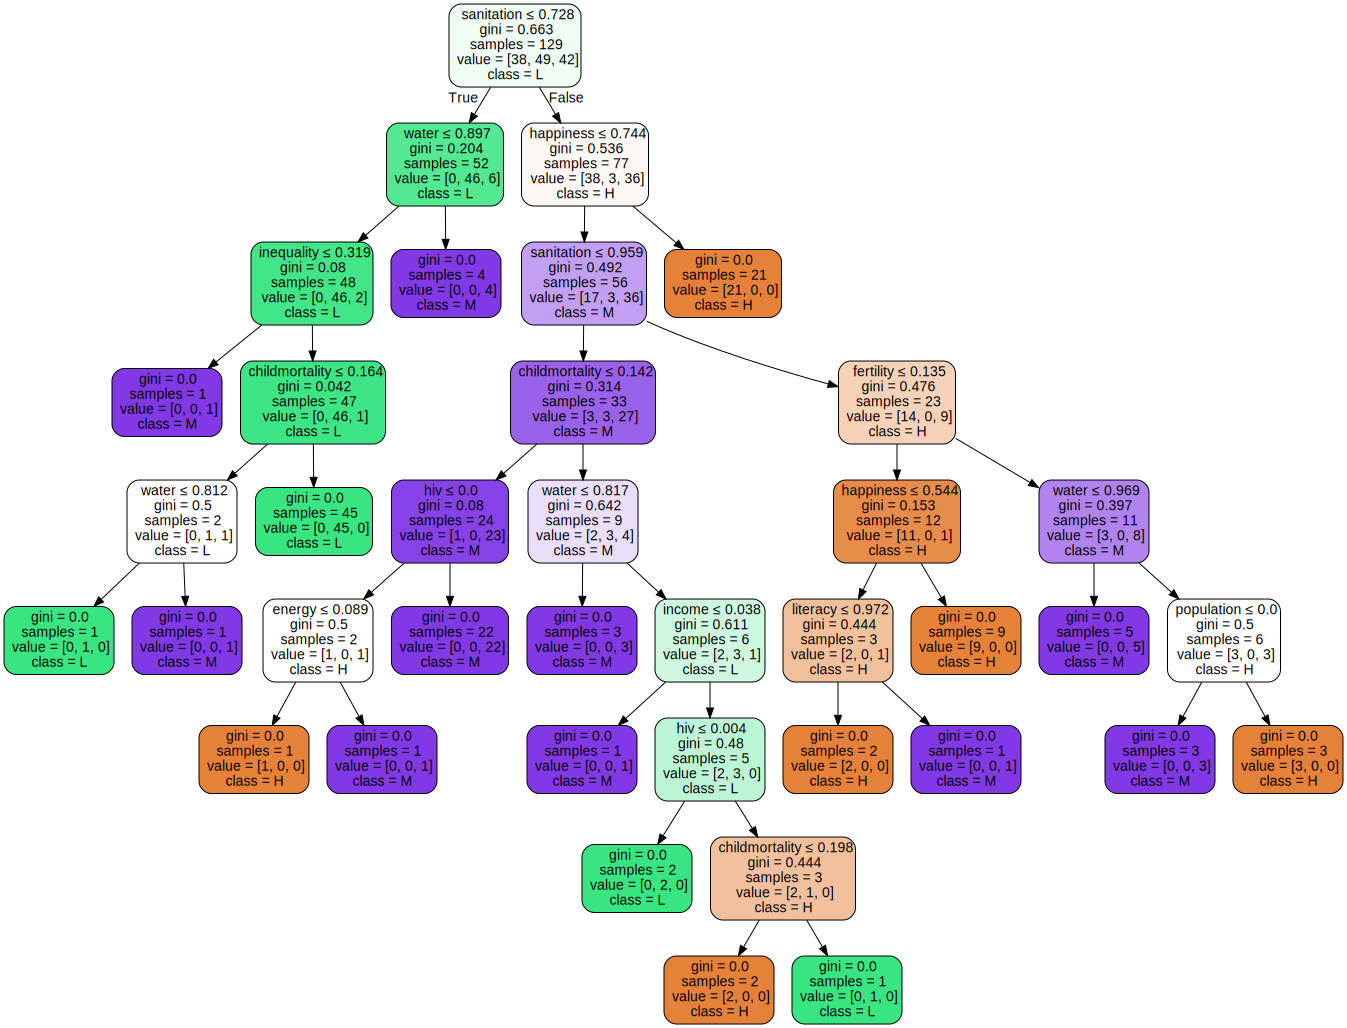

In [142]:
viewDecisionTree(model_dt, X.columns)

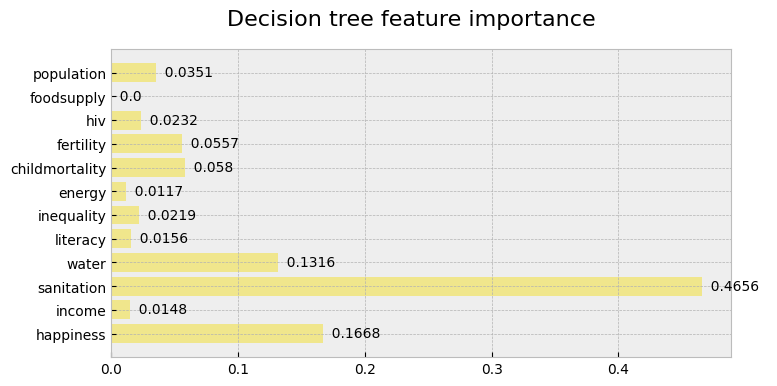

In [143]:
decisionTreeSummary(model_dt, X.columns)

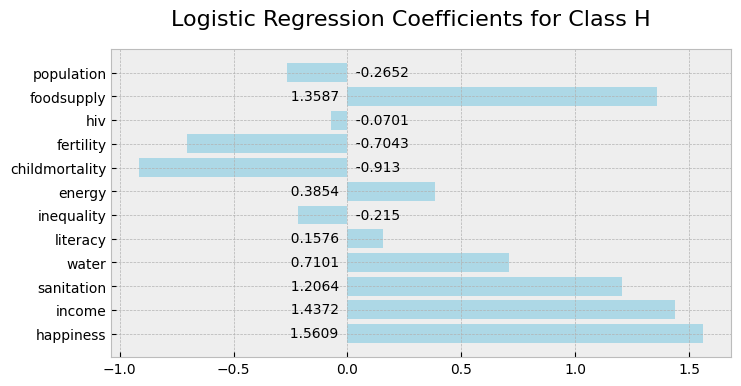

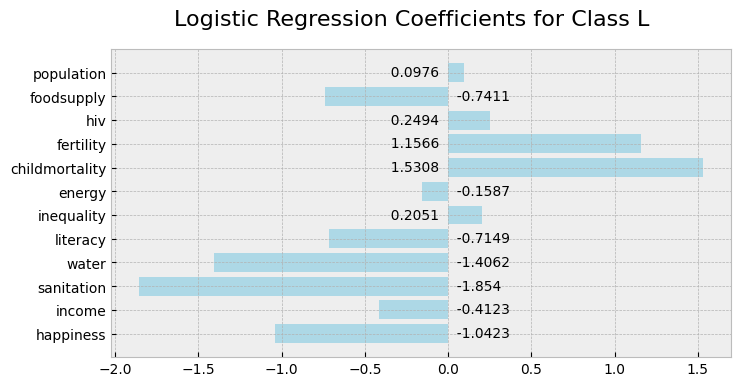

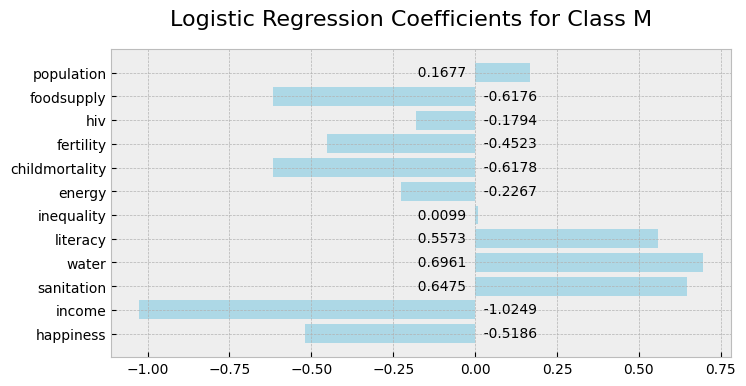

In [144]:
logisticRegressionSummary(model_lr, X.columns)

Looking at the first chart, you can see that high food supply, income, and sanitation are indicators of high life expectancy
***
Low sanitation is the most significant indicator of low life expectancy:
****
Low income is the most significant indicator of medium life expectancy:

# Build and Evaluate a Regression Model

## Import the Necessary Libraries

In [147]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Sklearn regression model evaluation function
from sklearn.metrics import mean_absolute_error

# Convenience functions.  This can be found on the course github
from functions import *

## Define the Task
The task is:

Make predictions about a country's life expectancy in years from a set of metrics for the country.

## Acquire Clean Data

In [149]:
# Load the data
dataset = pd.read_csv("/content/world_data.csv")

# Remove sparsely populated features
dataset = dataset.drop(["murder","urbanpopulation","unemployment"], axis=1)

# Impute all features with mean
numerical_cols = dataset.select_dtypes(include=np.number).columns # Select numerical columns
means = dataset[numerical_cols].mean().to_dict() # Calculate mean only for numerical columns
for m in means:
    dataset[m] = dataset[m].fillna(value=means[m])

## Understand the Data


In [150]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [151]:
plt.style.use('bmh')

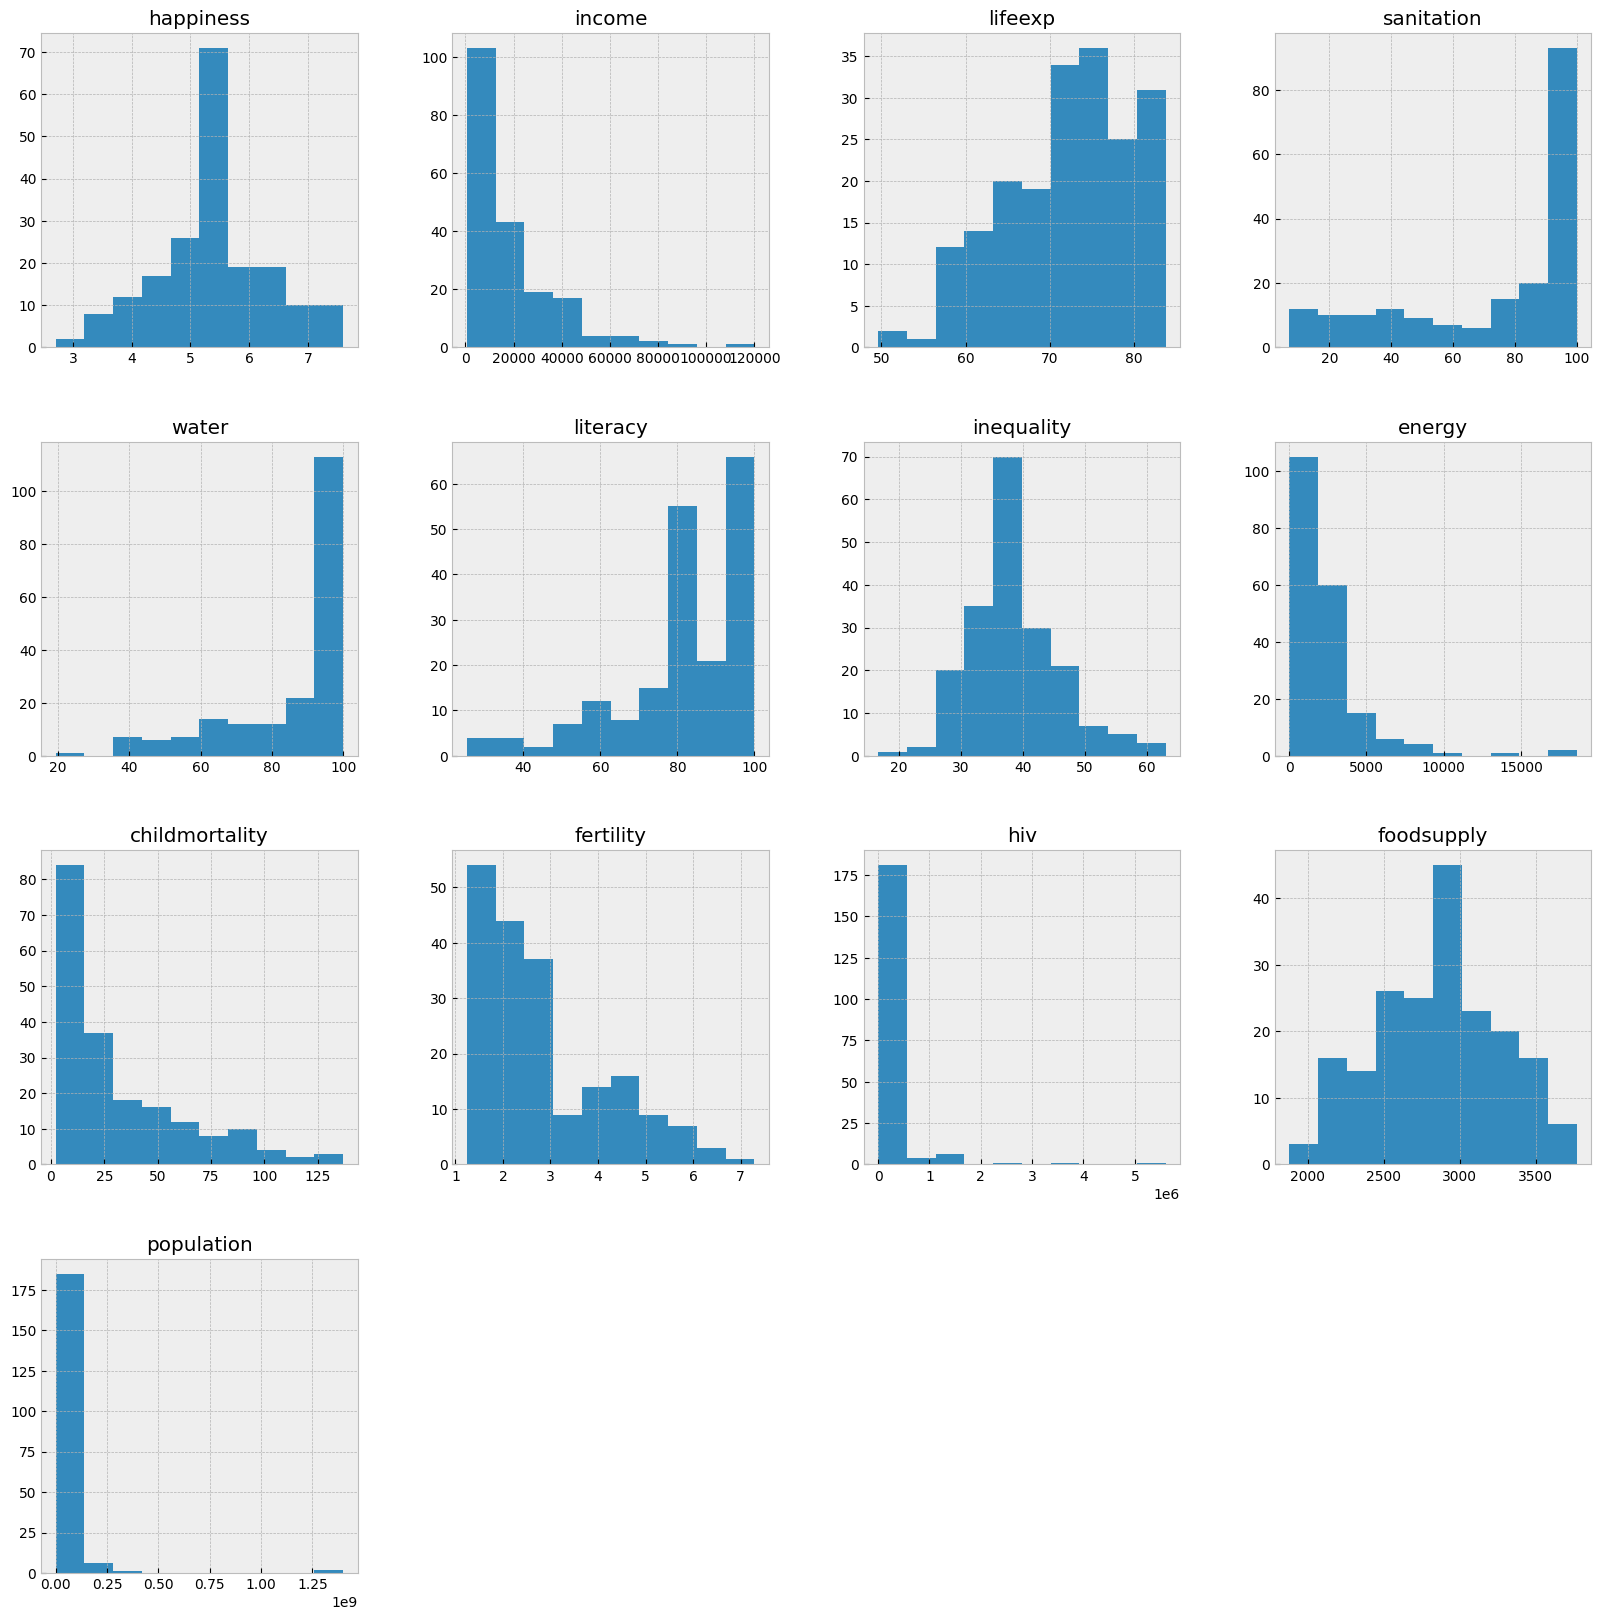

In [152]:
dataset.hist(figsize=(20,20))
plt.show()

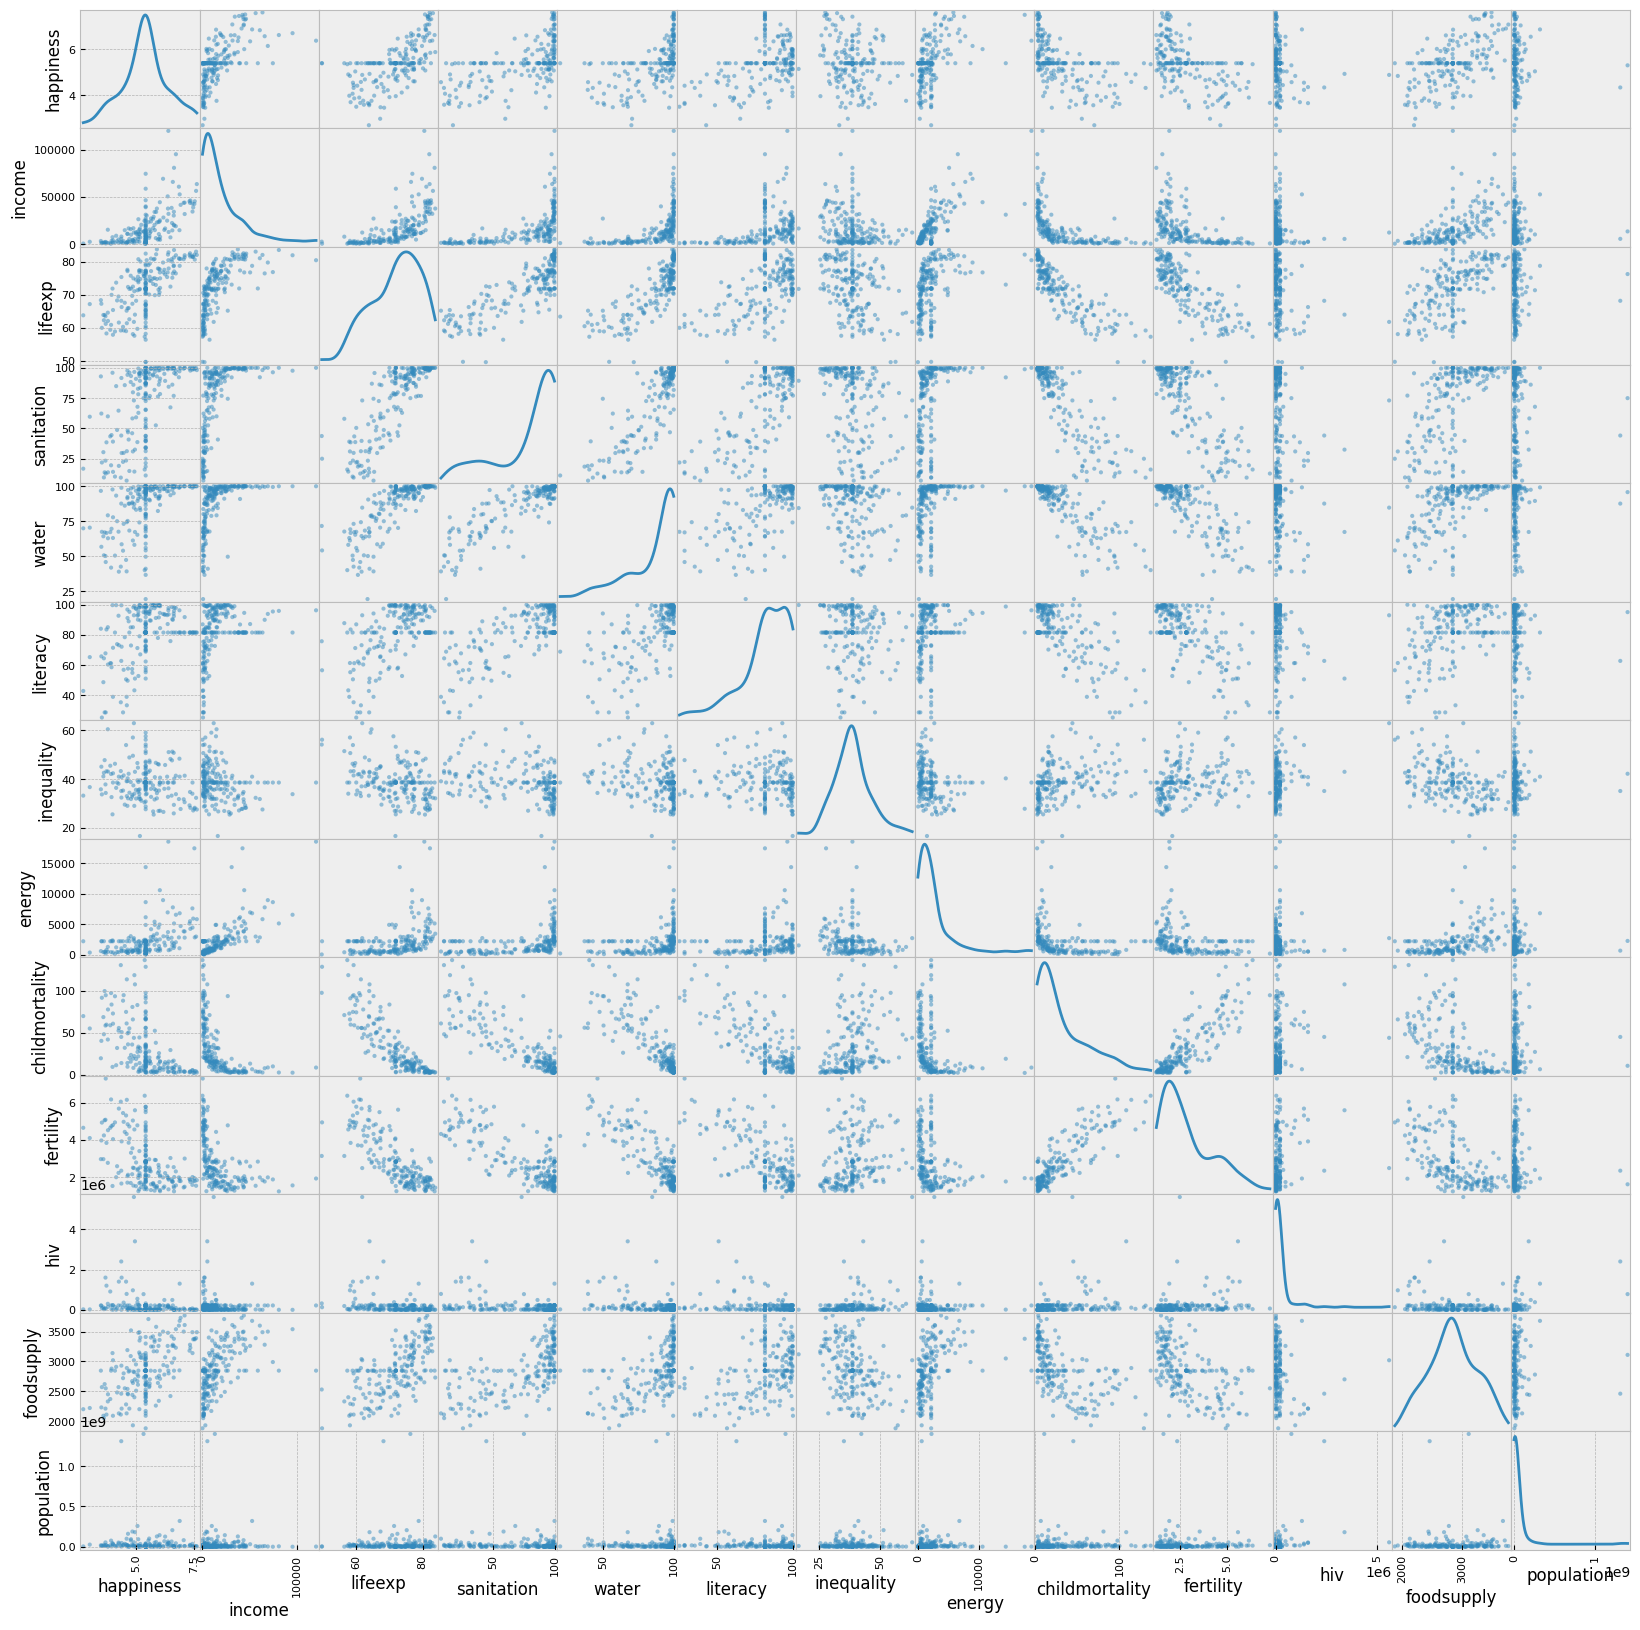

In [153]:
scatterMatrix(dataset)

## Prepare Data

### Select Features and Split Into Input and Target Features

In [154]:
y = dataset["lifeexp"]
X = dataset[['happiness', 'income', 'sanitation', 'water', 'literacy', 'inequality', 'energy', 'childmortality', 'fertility',  'hiv', 'foodsupply', 'population']]

### Scale Features

In [155]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)

## Build Models

### Split Into Test and Training Sets

In [156]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Create Multiple Models, Fit and Check Them

In [157]:
models = [LinearRegression(), KNeighborsRegressor(), SVR()]

In [158]:
for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__, mean_absolute_error(Y_train, predictions))

LinearRegression 2.2920035925091757
KNeighborsRegressor 2.1955055341375447
SVR 2.5427645613630157


## Evaluate Models

In [159]:
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__, mean_absolute_error(Y_test, predictions))

LinearRegression 2.4463956508110294
KNeighborsRegressor 2.5532340600575916
SVR 2.6412058180288183


Which is the best model?  The one with the lowest mean absolute error, which is linear regression.  So we will choose this model:


In [160]:
model = models[0]

In [161]:
predictions = model.predict(X_test)
df = X_test.copy()
df['Prediction'] = predictions
df['Actual'] = Y_test
df["Error"] = Y_test - predictions
df

happiness    income  sanitation     water  literacy  inequality  \
44    0.262009  0.027702    0.077701  0.724907  0.618474    0.556034   
172   0.549625  0.097816    0.629789  1.000000  0.753331    0.473693   
163   0.549625  0.010446    0.352131  0.558860  0.753331    0.439655   
35    0.420443  0.079387    0.926819  0.980173  0.638554    0.327586   
136   0.484455  0.042278    0.765390  0.890954  0.911647    0.392241   
..         ...       ...         ...       ...       ...         ...   
189   0.549625  0.038257    0.930047  0.998761  0.986613    0.450431   
18    0.350346  0.007765    0.165949  0.428748  0.045515    0.403017   
159   0.549625  0.101167    0.766466  0.945477  0.753331    0.473693   
113   0.445901  0.098654    0.710504  0.810409  0.906292    1.000000   
54    0.417876  0.128810    0.874085  0.936803  0.799197    0.478448   

       energy  childmortality  fertility       hiv  foodsupply    population  \
44   0.017505        0.436202   0.462810  0.041061    0.603175  1.970658e-02   
172  0.116950        0.247774   0.263789  0.038917    0.511086  2.142874e-07   
163  0.005617        0.398368   0.404959  0.038917    0.613757  7.214342e-05   
35   0.043324        0.159496   0.342149  0.001686    0.867725  6.699267e-02   
136  0.034718        0.146884   0.119008  0.044633    0.460317  6.684981e-02   
..        ...             ...        ...       ...         ...           ...   
189  0.029984        0.108309   0.403306  0.038917    0.511086  6.785768e-05   
18   0.116950        0.640208   0.694215  0.021418    0.444444  1.292082e-02   
159  0.041549        0.100890   0.147107  0.038917    0.301587  6.857197e-05   
113  0.144721        0.310831   0.206612  1.000000    0.603175  3.949245e-02   
54   0.161934        0.100148   0.074380  0.017132    0.640212  5.670687e-02   

     Prediction    Actual     Error  
44    63.053160  65.40000  2.346840  
172   70.676398  71.93369  1.257292  
163   65.940097  61.60000 -4.340097  
35    75.009327  71.90000 -3.109327  
136   72.167158  74.30000  2.132842  
..          ...       ...       ...  
189   73.113437  70.30000 -2.813437  
18    61.812405  60.30000 -1.512405  
159   73.569757  71.40000 -2.169757  
113   65.229523  61.80000 -3.429523  
54    73.964840  75.80000  1.835160  

[65 rows x 15 columns]

## iterate
At this point, you will want to go back to previous steps such as cleansing and feature engineering, to attempt to make improvements to the model.



## Inspect the Models

Linear Regression

In [162]:
models[0].coef_

array([  5.00912637,   9.2096769 ,   5.41605897,   2.26122297,
        -4.13876626,  -3.31059309,  -5.53211396, -14.32217202,
        -1.63521978,  -2.01476135,   2.22581396,   3.20586791])

In [163]:
models[0].intercept_

np.float64(69.60409836404614)

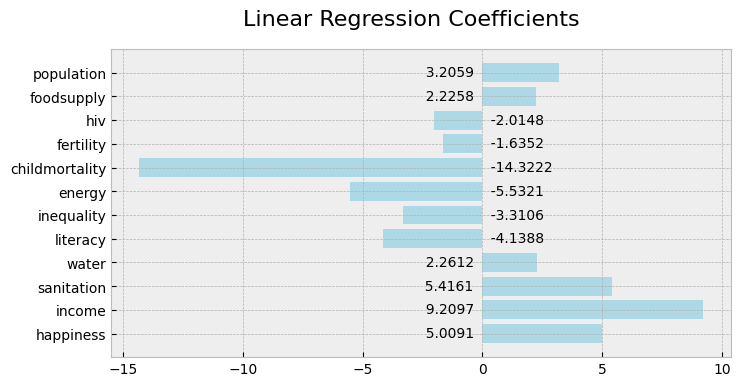

In [164]:
linearRegressionSummary(models[0], X.columns)